# 0. 导入openDigger
- 基于给出的镜像数据和 OpenDigger，完成项目 2015年/创建 - 归档期间的以下数据分析任务
- 项目：CoatiSoftware/Sourcetrail

In [2]:
var openDigger = require('../src/open_digger');

In [3]:
var query = openDigger.driver.clickhouse.query;

# 1. 数据分析
1. 每月新增 Star 和 Frok 的个数
2. 每月打开 Issue 和 关闭 Issue 的个数
3. 每月打开 PR 和合入 PR 的个数(注意，关闭 PR 不等于合入)
4. 每月在仓库中活跃(只要有日志产生就算)的不同开发者总数
5. Issue 从打开到关闭的平均时⻓和中位数(单位:天)
6. PR 从打开到合入的平均时⻓和中位数(单位:天)
7. Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天) 8. 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

## 1.1 每月新增Star个数

  时间  | 新增Star数
2019-11 |  3495
2019-12 |  1925
2020-01 |  744
2020-02 |  141
2020-03 |  174
2020-04 |  256
2020-05 |  167
2020-06 |  189
2020-07 |  59
2020-08 |  59
2020-09 |  78
2020-10 |  86
2020-11 |  124
2020-12 |  159
2021-01 |  73
2021-02 |  1259
2021-03 |  111
2021-07 |  77
2021-09 |  17
2021-11 |  49
2021-12 |  19
以上为有新增star的数据


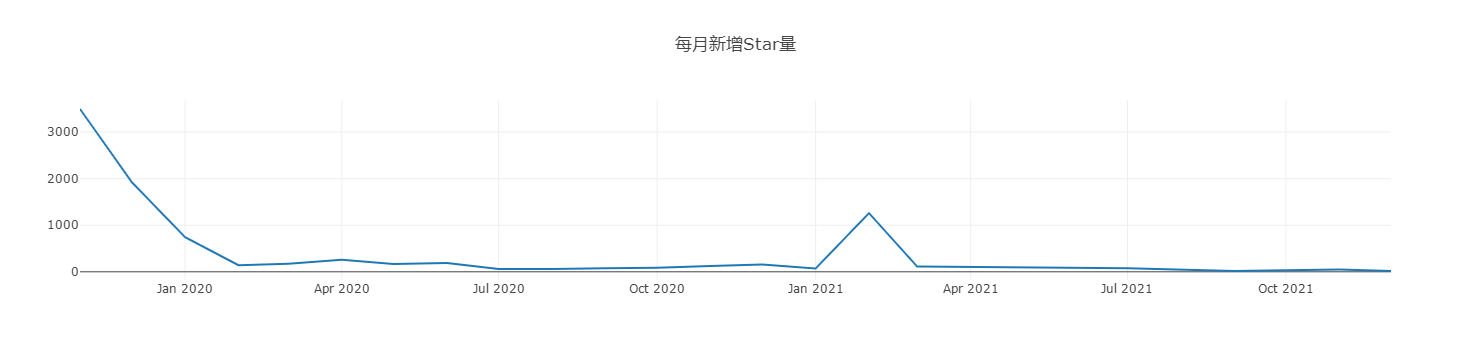

In [4]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select max(repo_stargazers_count)-min(repo_stargazers_count) as stars, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
     and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent') 
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 新增Star数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].stars);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].stars);
     };
    };
    console.log("以上为有新增star的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月新增Star量"});
})
 // group by toYear(created_date), toMonth(created_date)

## 1.2 每月新增Fork个数

  时间  | 新增forks数
2019-11 |  158
2019-12 |  136
2020-01 |  64
2020-02 |  18
2020-03 |  23
2020-04 |  31
2020-05 |  11
2020-06 |  11
2020-07 |  1
2020-08 |  9
2020-09 |  12
2020-10 |  17
2020-11 |  19
2020-12 |  14
2021-01 |  2
2021-02 |  55
2021-03 |  13
2021-07 |  9
2021-09 |  0
2021-11 |  9
2021-12 |  6
以上为有新增forks的数据


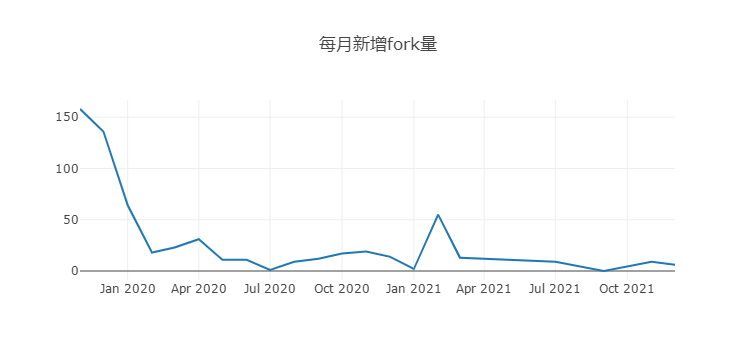

In [5]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
var months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select max(repo_forks_count)-min(repo_forks_count) as forks, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
     and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent') 
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 新增forks数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].forks);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].forks);
     };
    };
    console.log("以上为有新增forks的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月新增fork量"});
})

## 1.2 每月打开Issue个数

  时间  | 打开issue数
2015-12 |  20
2016-01 |  1
2016-02 |  24
2016-03 |  19
2016-04 |  4
2016-05 |  19
2016-06 |  23
2016-07 |  15
2016-08 |  44
2016-09 |  50
2016-10 |  29
2016-11 |  7
2016-12 |  14
2017-01 |  62
2017-02 |  15
2017-03 |  3
2017-04 |  24
2017-05 |  20
2017-06 |  30
2017-07 |  15
2017-08 |  17
2017-09 |  18
2017-10 |  36
2017-11 |  18
2017-12 |  5
2018-01 |  17
2018-02 |  7
2018-03 |  8
2018-04 |  9
2018-05 |  11
2018-06 |  12
2018-07 |  3
2018-08 |  14
2018-09 |  2
2018-10 |  7
2018-11 |  11
2018-12 |  19
2019-01 |  9
2019-02 |  6
2019-03 |  8
2019-04 |  8
2019-05 |  12
2019-06 |  2
2019-07 |  13
2019-08 |  13
2019-09 |  12
2019-10 |  6
2019-11 |  47
2019-12 |  30
2020-01 |  15
2020-02 |  7
2020-03 |  11
2020-04 |  27
2020-05 |  26
2020-06 |  10
2020-07 |  10
2020-08 |  8
2020-09 |  11
2020-10 |  8
2020-11 |  10
2020-12 |  4
2021-01 |  6
2021-02 |  10
2021-03 |  13
2021-04 |  5
2021-05 |  4
2021-06 |  12
2021-07 |  7
2021-08 |  6
2021-09 |  4
2021-10 |  3
2021-11 |  4
以上为有

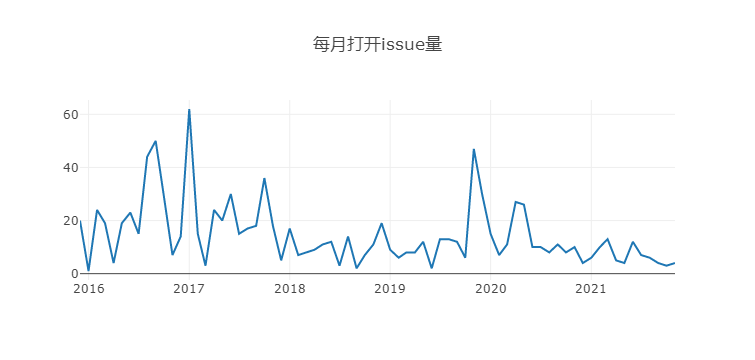

In [30]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
var months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(issue_id) as open_num, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
    and type = 'IssuesEvent' 
    and action in('opened','reopened')
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 打开issue数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].open_num);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].open_num);
     };
    };
    console.log("以上为有打开issue的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月打开issue量"});
})

## 2.2 每月关闭Issue个数

  时间  | 关闭issue数
2015-12 |  4
2016-01 |  5
2016-02 |  9
2016-03 |  10
2016-04 |  12
2016-05 |  6
2016-06 |  10
2016-07 |  7
2016-08 |  12
2016-09 |  16
2016-10 |  25
2016-11 |  7
2016-12 |  15
2017-01 |  19
2017-02 |  31
2017-03 |  2
2017-04 |  13
2017-05 |  17
2017-06 |  14
2017-07 |  15
2017-08 |  22
2017-09 |  3
2017-10 |  18
2017-11 |  23
2017-12 |  10
2018-01 |  10
2018-02 |  6
2018-03 |  5
2018-04 |  11
2018-05 |  6
2018-06 |  9
2018-07 |  11
2018-08 |  10
2018-09 |  1
2018-10 |  1
2018-11 |  11
2018-12 |  10
2019-01 |  11
2019-02 |  3
2019-03 |  5
2019-04 |  4
2019-05 |  5
2019-06 |  2
2019-07 |  7
2019-08 |  26
2019-09 |  4
2019-10 |  3
2019-11 |  38
2019-12 |  23
2020-01 |  7
2020-02 |  7
2020-03 |  9
2020-04 |  14
2020-05 |  11
2020-06 |  13
2020-07 |  4
2020-08 |  4
2020-09 |  4
2020-10 |  7
2020-11 |  14
2020-12 |  1
2021-01 |  2
2021-02 |  12
2021-03 |  9
2021-05 |  1
2021-07 |  4
2021-09 |  2
2021-10 |  9
2021-11 |  1
以上为有关闭issue的数据


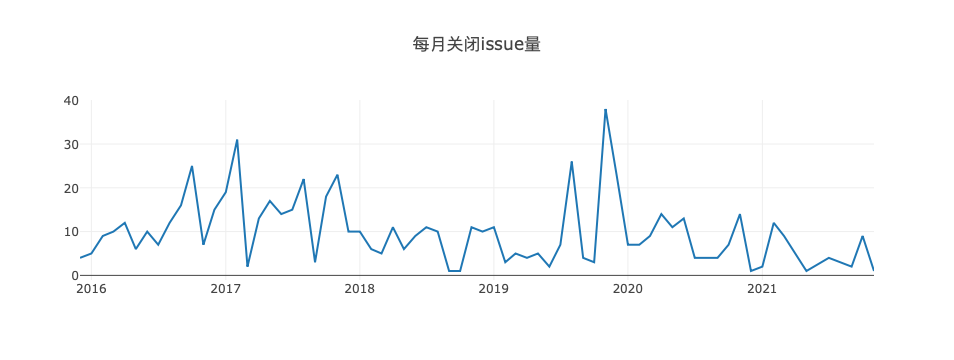

In [23]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
var months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(issue_id) as close_num, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
    and type = 'IssuesEvent' 
    and action in('closed')
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 关闭issue数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].close_num);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].close_num);
     };
    };
    console.log("以上为有关闭issue的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月关闭issue量"});
})
 // group by toYear(created_date), toMonth(created_date)

## 3.1 每月打开PR次数

  时间  | 打开PR数
2019-11 |  26
2019-12 |  24
2020-01 |  17
2020-02 |  22
2020-03 |  10
2020-04 |  17
2020-05 |  9
2020-06 |  12
2020-08 |  1
2020-09 |  2
2020-10 |  8
2020-11 |  5
2020-12 |  4
2021-01 |  2
2021-02 |  12
2021-03 |  5
2021-07 |  6
2021-09 |  1
2021-11 |  4
2021-12 |  1
以上为有打开PR的数据


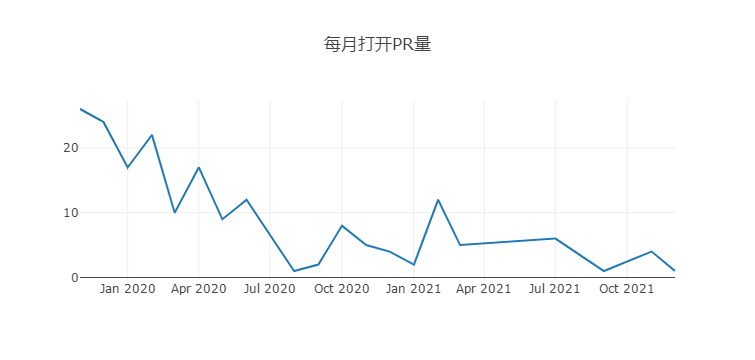

In [24]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
var months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(pull_merged_by_id) as open_pr_num, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
    and type = 'PullRequestEvent' 
    and action in('opened','reopened')
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 打开PR数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].open_pr_num);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].open_pr_num);
     };
    };
    console.log("以上为有打开PR的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月打开PR量"});
})
 // group by toYear(created_date), toMonth(created_date)

## 3.2 每月合入PR个数

  时间  | 合入PR数
2019-11 |  21
2019-12 |  24
2020-01 |  12
2020-02 |  21
2020-03 |  11
2020-04 |  9
2020-05 |  8
2020-06 |  13
2020-07 |  1
2020-08 |  2
2020-09 |  1
2020-10 |  7
2020-11 |  4
2020-12 |  3
2021-01 |  1
2021-02 |  12
2021-03 |  5
2021-07 |  5
2021-09 |  1
2021-11 |  4
以上为有合入PR的数据


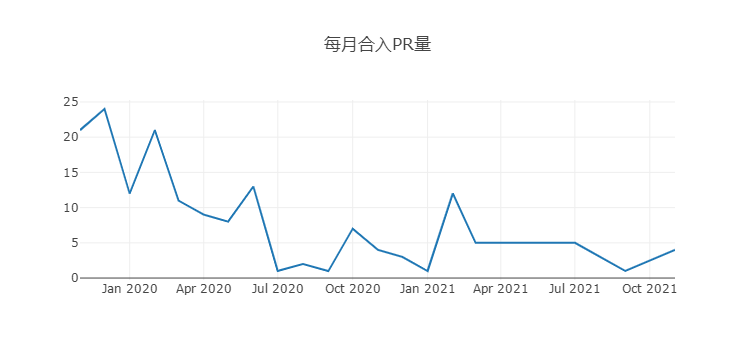

In [25]:
var years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022];
var project_id = 47690142;
var months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
Promise.all(years.map(ant =>{
     // console.log(ant);
     var s = `select count(pull_merged_by_id) as merge_pr_num, 
    formatDateTime(created_date,'%Y-%m') as time
    from github_log.year${ant} 
    where repo_id=${project_id} 
    and type = 'PullRequestEvent' 
    and pull_merged=1
    group by formatDateTime(created_date,'%Y-%m')
    order by formatDateTime(created_date,'%Y-%m')`;
    return query(s);
})).then(data =>{

    // 格式化存储数据
    var stars = [];
    var time_show = [];
    console.log("  时间  | 合入PR数");
    for (let i=0;i<data.length;i++){
     for (let j=0; j<data[i].length; j++){
      stars.push(data[i][j].merge_pr_num);
      time_show.push(data[i][j].time);
      console.log(data[i][j].time,"| ",data[i][j].merge_pr_num);
     };
    };
    console.log("以上为有合入PR的数据");
    
      
        // 绘图
    var dd = [{x:time_show, y:stars,type:"scatter"},];
    openDigger.render.plotly(dd, {title: "每月合入PR量"});
})

## 4. 每月在仓库中活跃(只要有日志产生就算)的不同开发者总数

In [4]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_active= []
for (var y=0;y<years.length;y++)
{
    var year = years[y];
    query(    
        `SELECT 
        formatDateTime(created_date, '%Y-%m') as Time,
        count(distinct actor_id) as Amount
        FROM github_log.year${year}
        where repo_name = 'CoatiSoftware/Sourcetrail'
        group by formatDateTime(created_date, '%Y-%m')
        order by formatDateTime(created_date, '%Y-%m')`).then(res=>{
        if (res.length!=0){
        res_active = res_active.concat(res);}
    });
}

┌─────────┬───────────┬────────────────┐
│ (index) │   Date    │ 不同开发者总数 │
├─────────┼───────────┼────────────────┤
│    0    │ '2019-11' │     '4597'     │
│    1    │ '2019-12' │     '2205'     │
│    2    │ '2020-01' │     '965'      │
│    3    │ '2020-02' │     '245'      │
│    4    │ '2020-03' │     '261'      │
│    5    │ '2020-04' │     '383'      │
│    6    │ '2020-05' │     '267'      │
│    7    │ '2020-06' │     '256'      │
│    8    │ '2020-07' │     '187'      │
│    9    │ '2020-08' │     '195'      │
│   10    │ '2020-09' │     '233'      │
│   11    │ '2020-10' │     '193'      │
│   12    │ '2020-11' │     '190'      │
│   13    │ '2020-12' │     '213'      │
│   14    │ '2021-01' │     '201'      │
│   15    │ '2021-02' │     '1387'     │
│   16    │ '2021-03' │     '401'      │
│   17    │ '2021-04' │     '241'      │
│   18    │ '2021-05' │     '189'      │
│   19    │ '2021-06' │     '175'      │
│   20    │ '2021-07' │     '175'      │
│   21    │ '2021-08' │

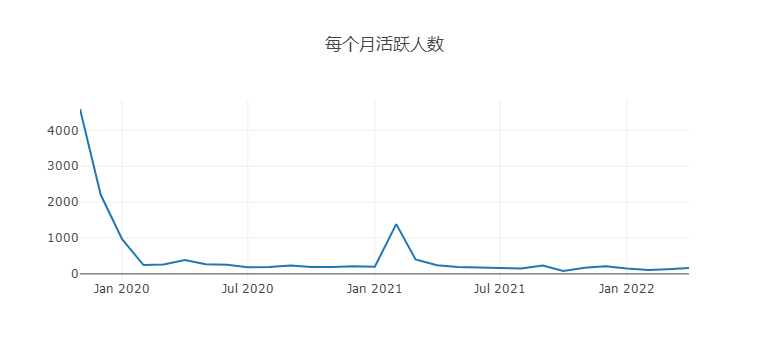

In [29]:
// 绘图
for(let i = 0; i < res_active.length-1; i++){
    for(let j = 0; j <res_active.length-1; j++){
        var d1 = new Date(res_active[j]['Time']);
        var d2 = new Date(res_active[j+1]['Time']);
        if(d1>d2){
            var current = res_active[j]
            res_active[j] = res_active[j+1]
            res_active[j+1] = current
        }
    }
}

var x_axis = []
var y_axis = []
for (var y_index=0 ;y_index<res_active.length;y_index++){
        x_axis.push(res_active[y_index]['Time']);
        y_axis.push(res_active[y_index]['Amount']);
        
    }


var table_data = [];
for (var t = 0;t<x_axis.length;t++){
    table_data.push({'Date':x_axis[t],'不同开发者总数':y_axis[t]});
}
console.table(table_data);

openDigger.render.plotly([
     {x: x_axis, y: y_axis}
    ], {title: `每个月活跃人数`});  

## 5. Issue 从打开到关闭的平均时⻓和中位数(单位:天)

In [6]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
var res_minus= []
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT dateDiff('minute', issue_created_at, issue_closed_at) as minus
            FROM github_log.year${year} 
            WHERE
            repo_name = 'CoatiSoftware/Sourcetrail' and 
            type='IssuesEvent' and
            minus > 0)
            `).then(res=>{
        if (res.length!=0){
        res_minus = res_minus.concat(res);}
    });
}


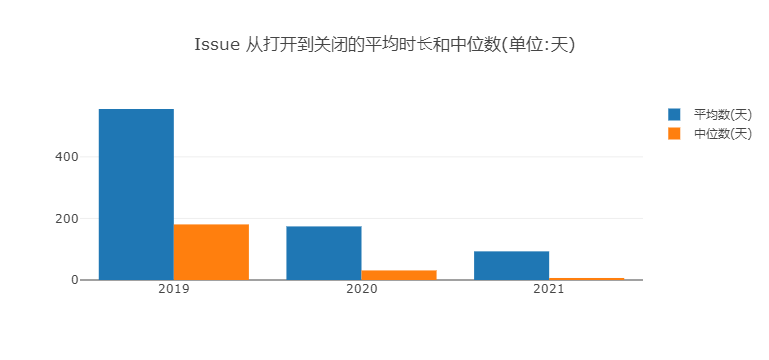

In [7]:
var x_axis_issue = []
var y_axis_issue_average = []
var y_axis_issue_mid = []
for(let i = 0; i < res_minus.length-1; i++){
    for(let j = 0; j <res_minus.length-1; j++){
        if(res_minus[j]['year'] > res_minus[j+1]['year']){
            var current = res_minus[j]
            res_minus[j] = res_minus[j+1]
            res_minus[j+1] = current
        }
    }
}
for (var i=0;i<res_minus.length;i++){
    if(res_minus[i]['average']!=null){
        x_axis_issue.push(res_minus[i]['year']);
        y_axis_issue_average.push(res_minus[i]['average']/(60*24));
        y_axis_issue_mid.push(res_minus[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_issue, y:  y_axis_issue_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_issue, y:  y_axis_issue_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'Issue 从打开到关闭的平均时⻓和中位数(单位:天)',
    })

## 6. Issue 从打开到关闭的平均时⻓和中位数(单位:天)

In [8]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_pr_merger= []
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT dateDiff('second', issue_created_at, pull_merged_at) as minus
            FROM github_log.year${year} 
            WHERE
            repo_name = 'CoatiSoftware/Sourcetrail' and 
            pull_merged == 1 and
            minus > 0)
            `).then(res=>{
        if (res.length!=0){
        res_pr_merger = res_pr_merger.concat(res);}
    });
}

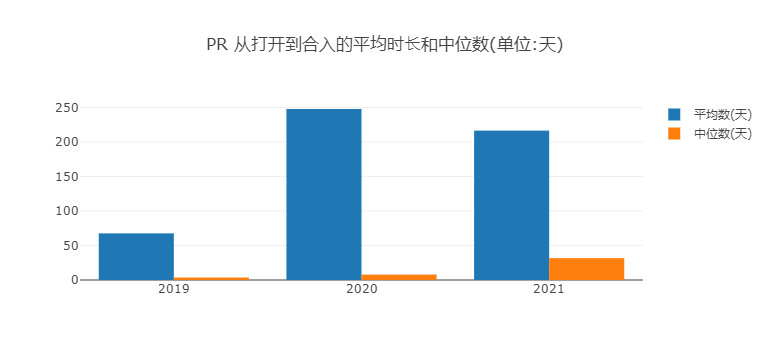

In [8]:
var x_axis_pr_merge = []
var y_axis_pr_merge_average = []
var y_axis_pr_merge_mid = []
for(let i = 0; i < res_pr_merger.length-1; i++){
    for(let j = 0; j <res_pr_merger.length-1; j++){
        if(res_pr_merger[j]['year'] > res_pr_merger[j+1]['year']){
            var current = res_pr_merger[j]
            res_pr_merger[j] = res_pr_merger[j+1]
            res_pr_merger[j+1] = current
        }
    }
}
for (var i=0;i<res_pr_merger.length;i++){
    if(res_pr_merger[i]['average']!=null){
        x_axis_pr_merge.push(res_pr_merger[i]['year']);
        y_axis_pr_merge_average.push(res_pr_merger[i]['average']/(60*24));
        y_axis_pr_merge_mid.push(res_pr_merger[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_pr_merge, y:  y_axis_pr_merge_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_pr_merge, y:  y_axis_pr_merge_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'PR 从打开到合入的平均时⻓和中位数(单位:天)',
    })

## 7. Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天)

In [10]:
years = [2015,2016,2017,2018,2019,2020,2021,2022]
var res_issue_pr= []
for (var y=0;y<years.length;y++)
{
    var year = years[y];
query(    
        `SELECT ${year} as year , avg(minus) as average, quantile(0.5)(minus) as mid FROM (
            SELECT 
            dateDiff('second',  issue_created_at, issue_comment_created_at) as minus,
            issue_id, 
            issue_created_at, 
            issue_comment_created_at 
            FROM github_log.year${year} 
            WHERE repo_name = 'CoatiSoftware/Sourcetrail' AND 
            issue_id<>0 AND 
            issue_comment_author_id<>0 AND 
            issue_comment_author_id<>issue_author_id)
            `).then(res=>{
        if (res.length!=0){
        res_issue_pr = res_issue_pr.concat(res);}
    });
}

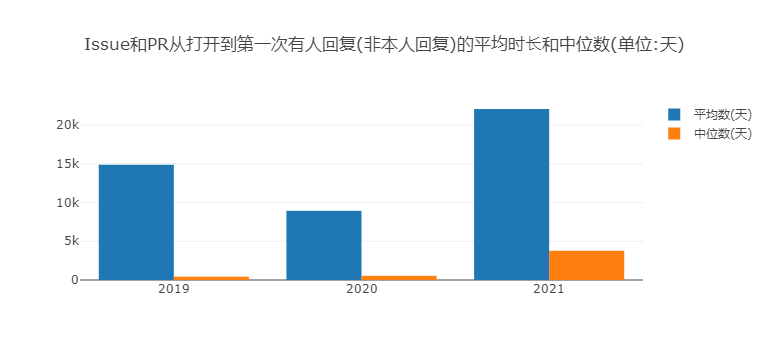

In [19]:
var x_axis_issue_pr = []
var y_axis_issue_pr_average = []
var y_axis_issue_pr_mid = []
for(let i = 0; i < res_issue_pr.length-1; i++){
    for(let j = 0; j <res_issue_pr.length-1; j++){
        if(res_issue_pr[j]['year'] > res_issue_pr[j+1]['year']){
            var current = res_issue_pr[j]
            res_issue_pr[j] = res_issue_pr[j+1]
            res_issue_pr[j+1] = current
        }
    }
}
for (var i=0;i<res_issue_pr.length;i++){
    if(res_issue_pr[i]['average']!=null){
        x_axis_issue_pr.push(res_issue_pr[i]['year']);
        y_axis_issue_pr_average.push(res_issue_pr[i]['average']/(60*24));
        y_axis_issue_pr_mid.push(res_issue_pr[i]['mid']/(60*24));
    }
}
openDigger.render.plotly([
        {x: x_axis_issue_pr, y:  y_axis_issue_pr_average, type: 'bar',name:'平均数(天)'},
    {x: x_axis_issue_pr, y:  y_axis_issue_pr_mid, type: 'bar',name:'中位数(天)'}
    ], {
        title: 'Issue和PR从打开到第一次有人回复(非本人回复)的平均时⻓和中位数(单位:天)',
    })

## 8. 根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

- 2017年打开、关闭Issue量达到多年来的最高值：此时在其官网上，宣布Beta版结束并发布Sourcetrail1.0；
- 在2019年11月属于高峰新增Star、fork数，Issue打开到关闭的时间也为近几年来的峰值，每月活跃人数也一直处于高峰状态，此时项目应在社会上引起广泛关注：Sourcetrail为图形和代码视图引入了基于键盘的导航、项目设置中更简单的源组设置以及适用于Linux的Applmage下载；
- 2020年每月活跃人数，PR的打开合入，Issue打开关闭时间递减，有项目背景可知，期间项目不断更新、完善，Bug越来越少，PR越来越少，上述曲线走势与相吻合；
- 2019年到2021年期间，出现Star、fork高增以及下滑，以及2021年Issue、PR的中位数和平均数相差甚大，从项目背景可知2021年9月停止维护Sourcetrail，引起了部分人员的关注。